In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Example: Reading One File

In [14]:
time, xx, yy, vx, vy = np.loadtxt('video1.txt', unpack=True, skiprows=7)
time -= time[0]
time

array([ 0.        ,  0.03333333,  0.06666667,  0.1       ,  0.13333333,
        0.16666667,  0.2       ,  0.23333333,  0.26666667,  0.3       ,
        0.33333333,  0.36666667,  0.4       ,  0.43333333,  0.46666667,
        0.5       ,  0.53333333,  0.56666667,  0.6       ,  0.63333333])

## Reading Multiple Files

In [55]:
t1, y1 = np.loadtxt('BigBlackStyro1.txt', unpack=True, skiprows=7, usecols=[0, 2])
t2, y2 = np.loadtxt('BigBlackStyro2.txt', unpack=True, skiprows=7, usecols=[0, 2])
t3, y3 = np.loadtxt('BigBlackStyro3.txt', unpack=True, skiprows=7, usecols=[0, 2])

# Remove time zeropoint.
#t1 -= 1.4
t2 -= t2[0]
t3 = t3 - t3[0]

# Throw out last few datapoints so arrays are lined up.
#t1 = t1[:-3]
t2 = t2[:-2]
#y1 = y1[:-3]
y2 = y2[:-2]
print(len(t1), len(t2), len(t3))
print(len(y1), len(y2), len(y3))
#print(t1 - t2)
#print(t1 - t3)
print('Yay!')

(31, 28, 28)
(31, 28, 28)
Yay!


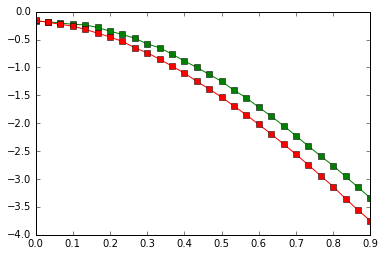

In [56]:
# Make a plot!
fig, ax = plt.subplots()
#ax.plot(t1, y1, color='orange', marker='s')
ax.plot(t2, y2, color='green', marker='s')
ax.plot(t3, y3, color='red', marker='s')

In [69]:
twood, ywood = np.loadtxt('WoodenBallTrial1-1.txt', unpack=True, skiprows=7, usecols=[0, 2])
tstyro, ystyro = np.loadtxt('BBB_Trial_1-1.txt', unpack=True, skiprows=7, usecols=[0, 2])
twood -= twood[0]
tstyro -= tstyro[0]

In [82]:
# Generate theoretical curve with no drag
grav = 9.8 # [m/s^2]
time = np.linspace(0, 1.0, 50)
ynodrag = -0.5 * grav * time**2

In [85]:
# Find optimum drag coefficient for linear drag 
mass = 7E-3  # [mass of styrofoam ball in kg]

bdragarr = np.linspace(0.005, 0.05, 100)
chisq = np.zeros_like(bdragarr)
for ii, bdrag in enumerate(bdragarr):
    tau = bdrag / mass
    ylindrag = grav * tau**2 * (1 - tstyro / tau - np.exp(- tstyro / tau))
    chisq[ii] = np.sum((ystyro - ylindrag)**2)

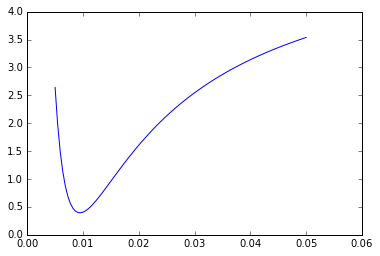

In [86]:
plt.plot(bdragarr, chisq)

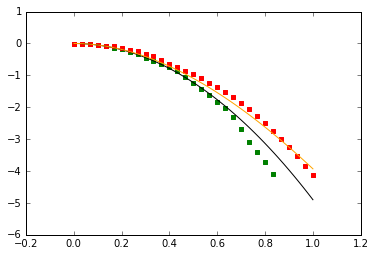

In [81]:
fig, ax = plt.subplots()
ax.scatter(twood, ywood, color='green', marker='s')
ax.scatter(tstyro, ystyro, color='red', marker='s')

ax.plot(time, ynodrag, color='black')
ax.plot(time, ylindrag, color='orange')